In [72]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import xgboost as xgb

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Uploading the data set to google colab
uploaded = files.upload()

Saving Telco_customer_churn.xlsx to Telco_customer_churn (1).xlsx


In [75]:
# Reading the csv and populating a data frame
file_xlsx = list(uploaded.keys())[0]
df = pd.read_excel(file_xlsx)

In [76]:
# prompt: displaying top 10 rows of the dataframe

df.head(10)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df[['Churn Score', 'Churn Value', 'Monthly Charges']]

,Churn Score,Churn Value,Monthly Charges
0,86,1,53.85
1,67,1,70.70
2,86,1,99.65
3,84,1,104.80
4,89,1,103.70
...,...,...,...
7038,45,0,21.15
7039,59,0,84.80
7040,71,0,103.20
7041,59,0,29.60


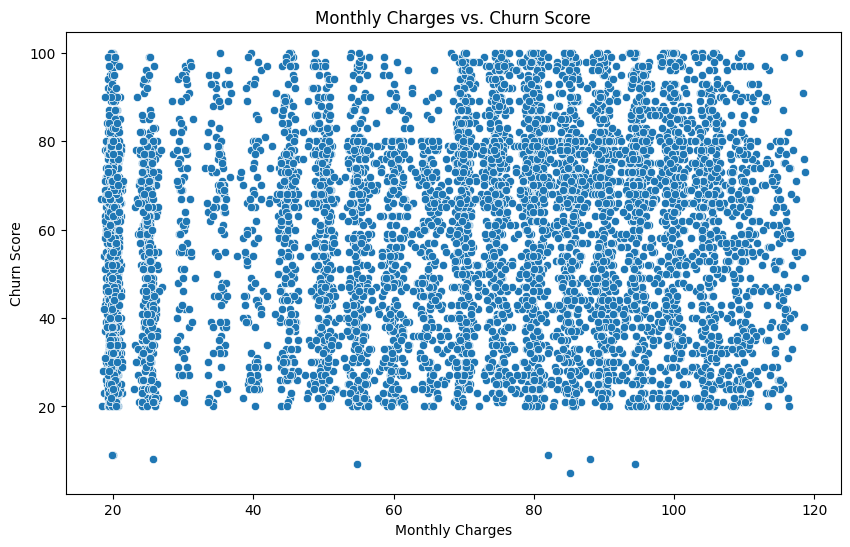

In [77]:
# prompt: scatter plot for monthly charges vs churn score

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Charges', y='Churn Score', data=df)
plt.title('Monthly Charges vs. Churn Score')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.show()



### **Analysis** : The data points are evenly distributed along the graph showing that there is no clear relationship between monthly charges and churn score.

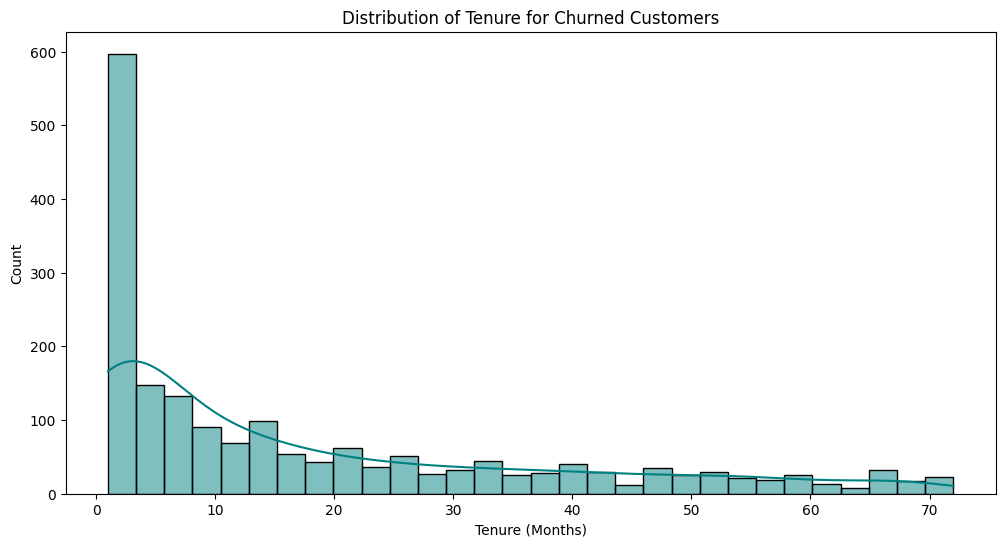

In [ ]:
# Histogram 'Tenure Months' for churned customers
# Set the figure size for the histogram
plt.figure(figsize=(12, 6))

# Create a histogram of 'Tenure Months' for churned customers
sns.histplot(df[df["Churn Value"] == 1]["Tenure Months"], bins=30, kde=True, color="teal")

# Set the title and axis labels
plt.title("Distribution of Tenure for Churned Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")

# Display the plot
plt.show()

## **Analysis** : Most churned customers have short tenures, it suggests that new customers are more likely to leave. This could be due to a poor onboarding experience or unmet expectations.

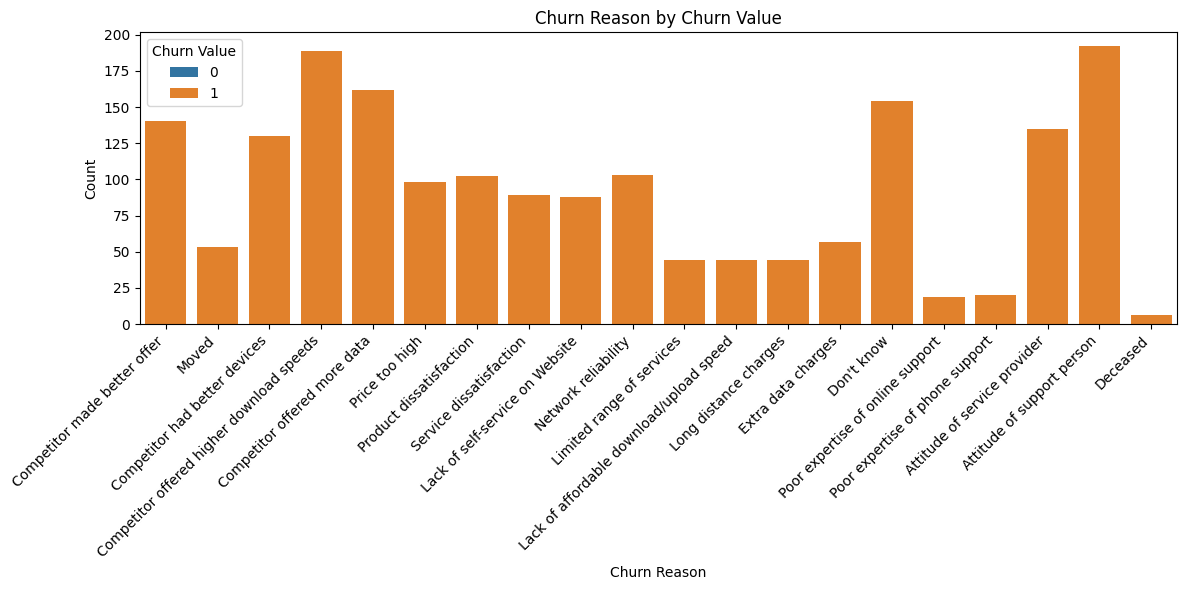

In [ ]:
# Assuming 'Churn Reason' and 'Churn Value' are column names in your DataFrame
plt.figure(figsize=(12, 6))

# Creating plot
sns.countplot(x='Churn Reason', hue='Churn Value', data=df)

# Labels and title
plt.title('Churn Reason by Churn Value')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=45 , ha='right')  # Rotate x-axis labels for readability

# Display plot
plt.tight_layout()
plt.show()


### **Analysis** : Competitor's pricing and service offerings play a significant role in churn. Atitude of service provider and support person are affecting the churn.

## **Class Balancing using SMOTE**

In [78]:
# Selecting relevant numerical features for SMOTE
df_numeric = df.select_dtypes(include=["number"])


## Separating features and target variable
X = df_numeric.drop(columns=["Churn Value"])  # Features
y = df_numeric["Churn Value"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Combining resampled data into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Churn Value"] = y_resampled

# Display class distribution after SMOTE
print(df_resampled["Churn Value"].value_counts())

Churn Value
0    4165
1    4165
Name: count, dtype: int64


## **SelectKbest after class balancing**

In [79]:
# Selecting best features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X_resampled, y_resampled)

print("Original number of features:", X_resampled.shape[1])
print("Number of selected features:", X_new.shape[1])

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X_resampled.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:", selected_feature_names)
# Now X_new contains the selected features
# We need to train our model using X_new and y_resampled with GridSearchcv

Original number of features: 8
Number of selected features: 3
Indices of selected features: [4 5 6]
Selected features: Index(['Tenure Months', 'Monthly Charges', 'Churn Score'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## **GridSearchCv of X_new, y_resampled using RFclassifier**

In [ ]:
# Define the paramreter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}

# create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_new, y_resampled)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(selector.transform(X_test))

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best parameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.9349339735894358
Test Accuracy: 0.9006387508871541

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1009
           1       0.77      0.93      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.91      0.88      1409
weighted avg       0.91      0.90      0.90      1409


Confusion Matrix:
 [[899 110]
 [ 30 370]]


## GridSearchCv of X_new, y_resampled using KNN

In [ ]:


# Define the parameter grid for GridSearchCV with KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV object for KNN
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_knn.fit(X_new, y_resampled)

# Print the best parameters and the best score for KNN
print("Best parameters (KNN):", grid_search_knn.best_params_)
print("Best score (KNN):", grid_search_knn.best_score_)

# Get the best estimator from GridSearchCV for KNN
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set using the best KNN model
y_pred_knn = best_knn_model.predict(selector.transform(X_test))

# Evaluate the KNN model
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Test Accuracy (KNN):", test_accuracy_knn)
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred_knn))


Best parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best score (KNN): 0.9261704681872749
Test Accuracy (KNN): 0.8899929027679205

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1009
           1       0.75      0.92      0.83       400

    accuracy                           0.89      1409
   macro avg       0.86      0.90      0.87      1409
weighted avg       0.90      0.89      0.89      1409


Confusion Matrix (KNN):
 [[886 123]
 [ 32 368]]


## GridSearchCv of X_new, y_resampled using decision tree

In [ ]:


# Define the parameter grid for GridSearchCV with Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_new, y_resampled)

# Print the best parameters and the best score for Decision Tree
print("Best parameters (Decision Tree):", grid_search_dt.best_params_)
print("Best score (Decision Tree):", grid_search_dt.best_score_)

# Get the best estimator from GridSearchCV for Decision Tree
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set using the best Decision Tree model
y_pred_dt = best_dt_model.predict(selector.transform(X_test))

# Evaluate the Decision Tree model
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))


Best parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score (Decision Tree): 0.9280912364945978
Test Accuracy (Decision Tree): 0.8985095812633073

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      1009
           1       0.76      0.94      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.91      0.88      1409
weighted avg       0.91      0.90      0.90      1409


Confusion Matrix (Decision Tree):
 [[890 119]
 [ 24 376]]


## GridSearchCv of X_new, y_resampled using gradient boost

In [ ]:


# Define the parameter grid for GridSearchCV with Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
}

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_gb.fit(X_new, y_resampled)

# Print the best parameters and the best score for Gradient Boosting
print("Best parameters (Gradient Boosting):", grid_search_gb.best_params_)
print("Best score (Gradient Boosting):", grid_search_gb.best_score_)

# Get the best estimator from GridSearchCV for Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_

# Make predictions on the test set using the best Gradient Boosting model
y_pred_gb = best_gb_model.predict(selector.transform(X_test))

# Evaluate the Gradient Boosting model
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Test Accuracy (Gradient Boosting):", test_accuracy_gb)
print("\nClassification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))


Best parameters (Gradient Boosting): {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best score (Gradient Boosting): 0.9350540216086435
Test Accuracy (Gradient Boosting): 0.8999290276792051

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1009
           1       0.76      0.94      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.91      0.88      1409
weighted avg       0.91      0.90      0.90      1409


Confusion Matrix (Gradient Boosting):
 [[893 116]
 [ 25 375]]


### GridSearchCv of X_new, y_resampled using xgboost

In [ ]:
# GridSearchCv of X_new, y_resampled using xgboost

# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X_new, y_resampled)

# Print the best parameters and the best score for XGBoost
print("Best parameters (XGBoost):", grid_search_xgb.best_params_)
print("Best score (XGBoost):", grid_search_xgb.best_score_)

# Get the best estimator from GridSearchCV for XGBoost
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set using the best XGBoost model
y_pred_xgb = best_xgb_model.predict(selector.transform(X_test))

# Evaluate the XGBoost model
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Test Accuracy (XGBoost):", test_accuracy_xgb)
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))


Best parameters (XGBoost): {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best score (XGBoost): 0.934813925570228
Test Accuracy (XGBoost): 0.8985095812633073

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1009
           1       0.76      0.93      0.84       400

    accuracy                           0.90      1409
   macro avg       0.87      0.91      0.88      1409
weighted avg       0.91      0.90      0.90      1409


Confusion Matrix (XGBoost):
 [[895 114]
 [ 29 371]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### ** Comparison of Models and Why They Perform Well or Poorly **

We tested different machine learning models to predict churn. The models used were **K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Gradient Boosting, and XGBoost**. Below is a comparison of how they performed and why some worked better than others.  

---

### **1. Performance Comparison**
| Model              | Accuracy  | Precision (Class 1) | Recall (Class 1) | False Positives | False Negatives |
|-------------------|----------|--------------------|-----------------|----------------|----------------|
| **KNN**          | 88.99%   | 0.75               | 0.92            | 123            | 32             |
| **Decision Tree** | 89.85%   | 0.76               | **0.94**        | 119            | **24**         |
| **Random Forest** | **90.06%** | **0.77**         | 0.93            | **110**        | 30             |
| **Gradient Boosting** | 89.99% | 0.76             | **0.94**        | 116            | 25             |
| **XGBoost**      | 89.85%   | 0.76               | 0.93            | 114            | 29             |

---

### **2. Why Each Model is Good or Bad**
#### **K-Nearest Neighbors (KNN)**
**Good because** it is simple and works well when data points are close together. It had high recall (0.92), meaning it caught most churn cases.  
**Bad because** it is slow for large datasets and struggles when there are too many features. It also had a lot of false positives (123), meaning it incorrectly predicted many non-churn customers as churn.  
 **How to Improve:** Scale the features, try a different distance metric

---

#### **Decision Tree**
 **Good because** it is easy to understand and captures patterns well. It had the **highest recall (0.94)**, meaning it detected almost all churn cases.  
 **Bad because** it can overfit the data, meaning it might learn patterns that don’t apply to new data. It also had more false positives than Random Forest.  
**How to Improve:** Limit the depth of the tree, increase the minimum samples needed to split a node, or use an ensemble method like Random Forest.  

---

#### **Random Forest**
**Good because** it uses multiple decision trees to make predictions, making it more accurate and stable. It had the **highest accuracy (90.06%)** and the lowest false positives (110).  
**Bad because** it takes more time to train and is not as easy to interpret as a single decision tree.  
**How to Improve:** Increase the number of trees (`n_estimators`)

---

#### **Gradient Boosting**
**Good because** it builds models step by step, fixing mistakes as it goes. It had high recall (0.94), making it good at finding churn cases.  
**Bad because** it is slower than Random Forest and needs careful tuning of settings like learning rate.  
**How to Improve:** Adjust the learning rate, use early stopping to prevent overfitting, or experiment with different depths.  

---

#### **XGBoost**
**Good because** it improves on Gradient Boosting by being faster and using better optimization. It had low false positives (114) and high recall (0.93).  
**Bad because** it is complex and can still overfit if not tuned properly.  
**How to Improve:** Tune the maximum depth and learning rate or try using feature engineering.  

---

### **3. Which Model is Best?**
- **Best Overall:** **Random Forest** (highest accuracy and lowest false positives).  
- **Best for Catching Churn:** **Decision Tree & Gradient Boosting** (highest recall).  
- **Best for Faster Predictions:** **XGBoost** (similar to Gradient Boosting but optimized).  

If we want the **most accurate and balanced model**, **Random Forest** is the best.  
If we want to **catch all churn cases**, **Decision Tree or Gradient Boosting** is better.  


## PCA of X_resampled, y_resampled  with 5 components

In [101]:
# prompt: write PCA of X_resampled, y_resampled with 5 components

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_resampled)

# Print the shape of the transformed data
print("Shape after PCA:", X_resampled.shape)

# Print the shape of the transformed data
print("Shape after PCA:", X_pca.shape)


Shape after PCA: (8330, 8)
Shape after PCA: (8330, 3)


##GgridsearchCV using rfclassifier on X_pca, y_resampled

In [96]:
# gridsearchCV using rfclassifier on X_pca, y_resampled

# Define the parameter grid for GridSearchCV
param_grid_pca = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create a RandomForestClassifier
rf_classifier_pca = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search_pca = GridSearchCV(estimator=rf_classifier_pca, param_grid=param_grid_pca, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_pca.fit(X_pca, y_resampled)

# Print the best parameters and the best score
print("Best parameters (PCA):", grid_search_pca.best_params_)
print("Best score (PCA):", grid_search_pca.best_score_)

# Get the best estimator from GridSearchCV
best_model_pca = grid_search_pca.best_estimator_

# Make predictions on the test set
# Apply PCA to the test set
X_test_pca = pca.transform(X_test)
y_pred_pca = best_model_pca.predict(X_test_pca)

# Evaluate the model
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Test Accuracy (PCA):", test_accuracy_pca)

# Print classification report
print("\nClassification Report (PCA):\n", classification_report(y_test, y_pred_pca))

# Print confusion matrix
print("\nConfusion Matrix (PCA):\n", confusion_matrix(y_test, y_pred_pca))


Best parameters (PCA): {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 400}
Best score (PCA): 0.7075630252100842
Test Accuracy (PCA): 0.6011355571327183

Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.80      0.59      0.68      1009
           1       0.38      0.64      0.48       400

    accuracy                           0.60      1409
   macro avg       0.59      0.61      0.58      1409
weighted avg       0.68      0.60      0.62      1409


Confusion Matrix (PCA):
 [[591 418]
 [144 256]]


## GridsearchCV using knn on X_pca, y_resampled

In [102]:
# gridsearchCV using knn on X_pca, y_resampled

# Define the parameter grid for GridSearchCV with KNN
param_grid_knn_pca = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# param_grid_knn_pca = {
#     'n_neighbors': [3, 5, 7, 9, 11, 15, 19, 21],
#     'weights': [ 'uniform','distance'],  # Keeping distance-based weighting
#     'metric': ['manhattan', 'euclidean', 'minkowski'],
#     # 'p': [1, 2]  # Minkowski parameter (1=Manhattan, 2=Euclidean)
# }

# Create a KNN classifier
knn_classifier_pca = KNeighborsClassifier()

# Create GridSearchCV object for KNN
grid_search_knn_pca = GridSearchCV(estimator=knn_classifier_pca, param_grid=param_grid_knn_pca, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_knn_pca.fit(X_pca, y_resampled)

# Print the best parameters and the best score for KNN
print("Best parameters (KNN PCA):", grid_search_knn_pca.best_params_)
print("Best score (KNN PCA):", grid_search_knn_pca.best_score_)

# Get the best estimator from GridSearchCV for KNN
best_knn_model_pca = grid_search_knn_pca.best_estimator_

# Make predictions on the test set using the best KNN model
X_test_pca = pca.transform(X_test)
y_pred_knn_pca = best_knn_model_pca.predict(X_test_pca)

# Evaluate the KNN model
test_accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)

print("Test Accuracy (KNN PCA):", test_accuracy_knn_pca)
print("\nClassification Report (KNN PCA):\n", classification_report(y_test, y_pred_knn_pca))
print("\nConfusion Matrix (KNN PCA):\n", confusion_matrix(y_test, y_pred_knn_pca))


Best parameters (KNN PCA): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score (KNN PCA): 0.7400960384153661
Test Accuracy (KNN PCA): 0.5926188786373314

Classification Report (KNN PCA):
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      1009
           1       0.34      0.47      0.39       400

    accuracy                           0.59      1409
   macro avg       0.55      0.55      0.54      1409
weighted avg       0.64      0.59      0.61      1409


Confusion Matrix (KNN PCA):
 [[648 361]
 [213 187]]


## GridSearchCV using decision tree on X_pca, y_resampled

In [98]:
# gridsearchCV using decision tree on X_pca, y_resampled

# Define the parameter grid for GridSearchCV with Decision Tree
param_grid_dt_pca = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier_pca = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object for Decision Tree
grid_search_dt_pca = GridSearchCV(estimator=dt_classifier_pca, param_grid=param_grid_dt_pca, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_dt_pca.fit(X_pca, y_resampled)

# Print the best parameters and the best score for Decision Tree
print("Best parameters (Decision Tree PCA):", grid_search_dt_pca.best_params_)
print("Best score (Decision Tree PCA):", grid_search_dt_pca.best_score_)

# Get the best estimator from GridSearchCV for Decision Tree
best_dt_model_pca = grid_search_dt_pca.best_estimator_

# Make predictions on the test set using the best Decision Tree model
y_pred_dt_pca = best_dt_model_pca.predict(X_test_pca)

# Evaluate the Decision Tree model
test_accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print("Test Accuracy (Decision Tree PCA):", test_accuracy_dt_pca)
print("\nClassification Report (Decision Tree PCA):\n", classification_report(y_test, y_pred_dt_pca))
print("\nConfusion Matrix (Decision Tree PCA):\n", confusion_matrix(y_test, y_pred_dt_pca))


Best parameters (Decision Tree PCA): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score (Decision Tree PCA): 0.670828331332533
Test Accuracy (Decision Tree PCA): 0.5833924769339958

Classification Report (Decision Tree PCA):
               precision    recall  f1-score   support

           0       0.74      0.65      0.69      1009
           1       0.32      0.42      0.37       400

    accuracy                           0.58      1409
   macro avg       0.53      0.54      0.53      1409
weighted avg       0.62      0.58      0.60      1409


Confusion Matrix (Decision Tree PCA):
 [[652 357]
 [230 170]]


## GridSearchCV using gradientboost on X_pca, y_resampled

In [100]:
# gridsearchCV using gradientboost on X_pca, y_resampled

# Define the parameter grid for GridSearchCV with Gradient Boosting
param_grid_gb_pca = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
}

# Create a Gradient Boosting classifier
gb_classifier_pca = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV object for Gradient Boosting
grid_search_gb_pca = GridSearchCV(estimator=gb_classifier_pca, param_grid=param_grid_gb_pca, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_gb_pca.fit(X_pca, y_resampled)

# Print the best parameters and the best score for Gradient Boosting
print("Best parameters (Gradient Boosting PCA):", grid_search_gb_pca.best_params_)
print("Best score (Gradient Boosting PCA):", grid_search_gb_pca.best_score_)

# Get the best estimator from GridSearchCV for Gradient Boosting
best_gb_model_pca = grid_search_gb_pca.best_estimator_

# Make predictions on the test set using the best Gradient Boosting model
y_pred_gb_pca = best_gb_model_pca.predict(X_test_pca)

# Evaluate the Gradient Boosting model
test_accuracy_gb_pca = accuracy_score(y_test, y_pred_gb_pca)
print("Test Accuracy (Gradient Boosting PCA):", test_accuracy_gb_pca)
print("\nClassification Report (Gradient Boosting PCA):\n", classification_report(y_test, y_pred_gb_pca))
print("\nConfusion Matrix (Gradient Boosting PCA):\n", confusion_matrix(y_test, y_pred_gb_pca))


Best parameters (Gradient Boosting PCA): {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Best score (Gradient Boosting PCA): 0.7074429771908763
Test Accuracy (Gradient Boosting PCA): 0.6132008516678495

Classification Report (Gradient Boosting PCA):
               precision    recall  f1-score   support

           0       0.78      0.65      0.70      1009
           1       0.37      0.53      0.44       400

    accuracy                           0.61      1409
   macro avg       0.57      0.59      0.57      1409
weighted avg       0.66      0.61      0.63      1409


Confusion Matrix (Gradient Boosting PCA):
 [[651 358]
 [187 213]]


## GridSearchCV using xgboost on X_pca, y_resampled

In [99]:
# gridsearchCV using xgboost on X_pca, y_resampled

# Define the parameter grid for XGBoost
param_grid_xgb_pca = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_classifier_pca = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create GridSearchCV object for XGBoost
grid_search_xgb_pca = GridSearchCV(estimator=xgb_classifier_pca, param_grid=param_grid_xgb_pca, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_xgb_pca.fit(X_pca, y_resampled)

# Print the best parameters and the best score for XGBoost
print("Best parameters (XGBoost PCA):", grid_search_xgb_pca.best_params_)
print("Best score (XGBoost PCA):", grid_search_xgb_pca.best_score_)

# Get the best estimator from GridSearchCV for XGBoost
best_xgb_model_pca = grid_search_xgb_pca.best_estimator_

# Make predictions on the test set using the best XGBoost model
y_pred_xgb_pca = best_xgb_model_pca.predict(X_test_pca)

# Evaluate the XGBoost model
test_accuracy_xgb_pca = accuracy_score(y_test, y_pred_xgb_pca)

print("Test Accuracy (XGBoost PCA):", test_accuracy_xgb_pca)
print("\nClassification Report (XGBoost PCA):\n", classification_report(y_test, y_pred_xgb_pca))
print("\nConfusion Matrix (XGBoost PCA):\n", confusion_matrix(y_test, y_pred_xgb_pca))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:34:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters (XGBoost PCA): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Best score (XGBoost PCA): 0.7295318127250899
Test Accuracy (XGBoost PCA): 0.631653655074521

Classification Report (XGBoost PCA):
               precision    recall  f1-score   support

           0       0.78      0.68      0.72      1009
           1       0.39      0.52      0.44       400

    accuracy                           0.63      1409
   macro avg       0.58      0.60      0.58      1409
weighted avg       0.67      0.63      0.64      1409


Confusion Matrix (XGBoost PCA):
 [[684 325]
 [194 206]]


### **Comparing the Models and Understanding Their Performance**  

We tested five different models using PCA (Principal Component Analysis) and compared their accuracy, precision, recall, and F1-score. Here’s how they performed:  

| Model                     | Best Score (CV) | Test Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|---------------------------|-----------------|----------------|---------------------|------------------|--------------------|
| **Random Forest (PCA)**    | 0.7073          | 0.6033         | 0.38                | **0.64**         | **0.48**           |
| **K-Nearest Neighbors (KNN PCA)** | **0.7401**  | 0.5926         | 0.34                | 0.47             | 0.39               |
| **Decision Tree (PCA)**    | 0.6708          | 0.5834         | 0.32                | 0.42             | 0.37               |
| **Gradient Boosting (PCA)**| 0.7074          | 0.6132         | 0.37                | 0.53             | 0.44               |
| **XGBoost (PCA)**          | 0.7295          | **0.6317**     | **0.39**            | 0.52             | 0.44               |

---

### **Which Model is Good or Bad and Why?**  

#### **1. Random Forest (PCA)**
- **Good:** High recall (64%), meaning it captures most positive cases. It works well with large datasets and handles overfitting if properly tuned.  
- **Bad:** Precision is low (38%), meaning it predicts many false positives.  
- **How to Improve:** Tuning `max_depth`, `min_samples_split`, and reducing overfitting can help.

#### **2. K-Nearest Neighbors (KNN PCA)**
- **Good:** Best training score (74%), meaning it fits well with the data.  
- **Bad:** It struggles with new data, showing low accuracy (59.3%). Precision is also low.  
- **How to Improve:** Adjusting the number of neighbors and changing distance metrics may help.

#### **3. Decision Tree (PCA)**
- **Good:** Easy to interpret and does not require much tuning.  
- **Bad:** Struggles with precision (32%) and recall (42%) for class 1. The model may overfit without proper pruning.  
- **How to Improve:** Pruning the tree and limiting `max_depth` will help control overfitting.

#### **4. Gradient Boosting (PCA)**
- **Good:** Balanced performance (61.3% accuracy, 53% recall), improving over time with boosting.  
- **Bad:** Slow to train and still has low precision (37%).  
- **How to Improve:** Tuning the learning rate and increasing the number of estimators might improve performance.

#### **5. XGBoost (PCA) – The Best Model**
- **Good:** Highest accuracy (63.2%) and a good balance of precision (39%) and recall (52%).  
- **Bad:** The model still misses some positive cases. Training time can be slow.  
- **How to Improve:** Adjusting `max_depth`, `subsample`, and learning rate can improve the model further.

---

### **Final Thoughts for PCA**  
**XGBoost is the best model** with the highest accuracy and a solid balance of precision and recall. **Random Forest** also performs well for recall but suffers from low precision. **Decision Tree** struggles with precision and recall and may benefit from pruning to reduce overfitting. To improve any model, adjusting the dataset balance, fine-tuning PCA components, and further hyperparameter optimization can help.

### **## Conclusion : When the performances are compared for different models on SelectKbest and PCA, SelectKbest yielded good and consistent performance than PCA**